# Aprendizaje NO Supervisado

# Clustering

In [1]:
import seaborn as sns
from sklearn import preprocessing
from sklearn import cluster
from sklearn.cluster import KMeans
from scipy.stats import itemfreq
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_csv(os.getcwd() + "\\data\\2008_small.csv",nrows=100000)
df = df.sample(frac = 1)

### Tipos distintos de clustering
https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68 

# K-Means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Kmeans maximiza la varianza intergrupal, y minimiza la varianza intragrupal

In [46]:
newdf = df[["AirTime","DepDelay"]].dropna()
# newdf = df[["AirTime","Distance","TaxiOut","TaxiIn","ArrDelay","DepDelay"]].dropna()

In [47]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(newdf)

kmeans

KMeans(n_clusters=4)

In [48]:
kmeans.labels_

array([0, 1, 0, ..., 0, 2, 1])

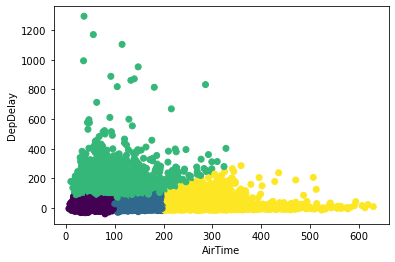

In [61]:
plt.scatter(newdf["AirTime"],newdf["DepDelay"],c = kmeans.labels_)
plt.xlabel("AirTime")
plt.ylabel("DepDelay")
plt.show()

Podemos obtener información sobre los centros de cada uno de los clusters

In [56]:
itemfreq(kmeans.labels_)

array([[    0, 53656],
       [    1, 30283],
       [    2,  4275],
       [    3,  9587]], dtype=int64)

In [58]:
kmeans.cluster_centers_

array([[ 60.07931452,   3.41907423],
       [134.71573453,   4.37788643],
       [ 92.4903801 , 135.24941342],
       [261.60106438,   8.48523427]])

Y hasta predicciones usando **datos nuevos**

In [62]:
alldf = pd.read_csv(os.getcwd() + "\\data\\2008_small.csv",nrows=1000000)[["AirTime","DepDelay"]].dropna()

In [63]:
kmeans.predict(alldf) # "clasificar" nuevos puntos usando lo aprendido con los primeros 100.000 casos

array([0, 3, 0, ..., 1, 0, 1])

In [64]:
itemfreq(kmeans.predict(alldf))

array([[     0, 539509],
       [     1, 301116],
       [     2,  42028],
       [     3,  95402]], dtype=int64)

Ahora vamos a hacer el proceso con los datos reescalados, hasta añadiendo más columnas de las que podemos visualizar

In [65]:
df = df[["AirTime","DepDelay","ArrDelay","Distance"]].dropna()
X_scaled = preprocessing.scale(df)

kmeans = KMeans(n_clusters=7, random_state=0).fit(X_scaled)

X_scaled # (x - media) / sd

array([[-0.31564175, -0.33850499, -0.28858186, -0.39560596],
       [ 0.09852874, -0.2818855 , -0.62525345, -0.19198652],
       [-1.11439912,  0.02952173, -0.1849906 , -1.05781177],
       ...,
       [-0.62626962, -0.05540751, -0.26268404, -0.57797815],
       [ 0.18727955,  2.49246977,  1.7055499 ,  0.00277989],
       [ 0.49790742, -0.45174398, -0.00370589,  0.2400408 ]])

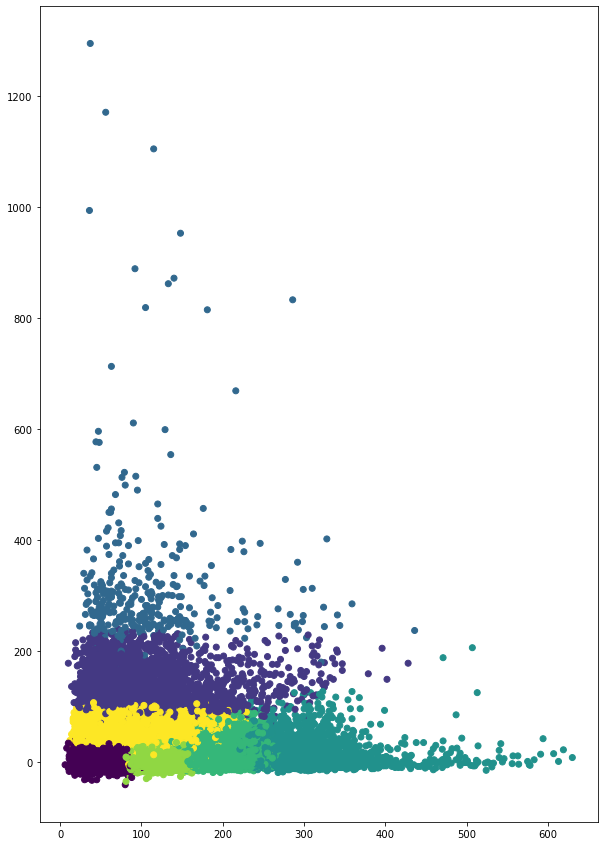

In [73]:
plt.figure(figsize=(10,15))
plt.scatter(df["AirTime"],df["DepDelay"],c = kmeans.labels_)
plt.show()

In [ ]:
Y = (X - media) / desviacion

In [ ]:
X = Y * desviacion + media

In [75]:
pd.DataFrame(kmeans.cluster_centers_, columns = df.columns)

,AirTime,DepDelay,ArrDelay,Distance
0,-0.73,-0.29,-0.29,-0.72
1,0.03,3.54,3.42,-0.00
2,0.13,8.73,8.18,0.08
3,2.88,-0.10,-0.11,2.92
4,1.33,-0.16,-0.16,1.33
5,0.18,-0.28,-0.29,0.16
6,-0.29,1.14,1.20,-0.31


In [81]:
pd.DataFrame( kmeans.cluster_centers_ * np.array(df.std()) + np.array(df.mean()), columns = df.columns)

,AirTime,DepDelay,ArrDelay,Distance
0,55.09,-0.44,-2.91,326.83
1,106.53,135.09,140.13,730.27
2,113.06,318.34,324.14,778.31
3,299.17,6.28,3.77,2381.81
4,194.30,4.39,1.94,1484.49
5,116.46,0.11,-2.97,824.17
6,84.86,50.13,54.49,555.57


# Hierarchical Cluster
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- Affinity
- Linkage

In [82]:
df = pd.read_csv(os.getcwd() + "\\data\\2008_small.csv",nrows=5000)
newdf = df[["AirTime","Distance","TaxiOut","ArrDelay","DepDelay"]].dropna()

In [86]:
clstr = cluster.AgglomerativeClustering(n_clusters=5)
clstr.fit(newdf)
clstr.labels_

array([1, 4, 3, ..., 2, 1, 3], dtype=int64)

In [88]:
clstr = cluster.AgglomerativeClustering(n_clusters=5)
clstr.fit_predict(newdf) # "Entrena" y muestra etiquetas directamente

array([1, 4, 3, ..., 2, 1, 3], dtype=int64)

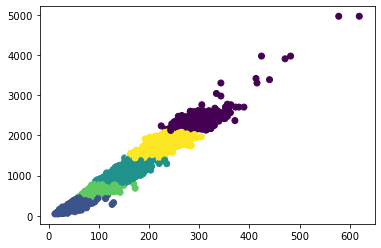

In [18]:
plt.scatter(newdf["AirTime"],newdf["Distance"],c = clstr.fit_predict(newdf))
plt.show()

In [97]:
newdf["Agrupacion"] = clstr.labels_
newdf.head()

,AirTime,Distance,TaxiOut,ArrDelay,DepDelay,Agrupacion
0,69.00,431,78.00,60.00,-3.00,1
1,246.00,1848,9.00,14.00,17.00,4
2,89.00,641,11.00,-8.00,0.00,3
3,219.00,1557,27.00,-2.00,-4.00,4
4,64.00,412,12.00,-9.00,-5.00,1


In [101]:
newdf.groupby("Agrupacion").describe()

AirTime                                                 Distance  \
             count   mean   std    min    25%    50%    75%    max    count   
Agrupacion                                                                    
0           208.00 308.59 49.04 224.00 282.00 301.50 330.00 619.00   208.00   
1          1966.00  50.47 15.36  12.00  40.00  51.00  62.00 129.00  1966.00   
2          1139.00 140.77 23.28  93.00 123.00 137.00 155.00 235.00  1139.00   
3          1229.00  92.27 15.30  59.00  82.00  90.00 101.00 172.00  1229.00   
4           362.00 216.30 29.44 158.00 195.00 213.50 235.00 304.00   362.00   

                    ... ArrDelay        DepDelay                           \
              mean  ...      75%    max    count  mean   std    min   25%   
Agrupacion          ...                                                     
0          2462.81  ...    20.25 143.00   208.00  8.33 24.58 -13.00 -3.00   
1           281.00  ...    12.00 575.00  1966.00 10.50 37.14 -24.00 -5.00   
2          1023.30  ...    14.00 595.00  1139.00 11.32 38.24 -30.00 -4.00   
3           618.80  ...    11.00 209.00  1229.00  7.33 25.90 -20.00 -4.00   
4          1694.01  ...    12.75 396.00   362.00  9.23 33.44 -11.00 -4.00   

                               
             50%   75%    max  
Agrupacion                     
0          -1.00  8.25 141.00  
1          -1.00  7.75 576.00  
2          -1.00 11.00 599.00  
3          -1.00  7.00 183.00  
4           0.00  8.00 398.00  

[5 rows x 40 columns]

In [36]:
### Ejercicios Clustering

1. Ajusta un modelo de K-means y un modelo de clúster jerárquico para los datos "iris". ¿Qué cantidad de clusters te parece razonable en este caso?



,sepal_length,sepal_width,petal_length,petal_width,species
108,6.70,2.50,5.80,1.80,virginica
52,6.90,3.10,4.90,1.50,versicolor
74,6.40,2.90,4.30,1.30,versicolor
65,6.70,3.10,4.40,1.40,versicolor
114,5.80,2.80,5.10,2.40,virginica


In [ ]:
df = sns.load_dataset("iris").sample(frac = 1)
df.head()

X = df[["sepal_length", "sepal_width","petal_length","petal_width"]]

X_scaled = pd.DataFrame(preprocessing.scale(X), columns = X.columns)
X_scaled

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
df["kmeans"] = kmeans.labels_

In [40]:
clstr = cluster.AgglomerativeClustering(n_clusters=3)
clstr.fit(X_scaled)
df["jerarquico"] = clstr.labels_

In [41]:
pd.crosstab(df.kmeans, df.jerarquico)

jerarquico,0,1,2
kmeans,,,
0,27,0,29
1,0,49,1
2,44,0,0


# Hacer trampas...

In [42]:
pd.crosstab(df.species, df.jerarquico)

jerarquico,0,1,2
species,,,
setosa,0,49,1
versicolor,23,0,27
virginica,48,0,2


In [43]:
pd.crosstab(df.species, df.kmeans)

kmeans,0,1,2
species,,,
setosa,0,50,0
versicolor,39,0,11
virginica,17,0,33


Esto ya no son trampas!

In [44]:
print("Grupos jerarquico")
print(df.jerarquico.value_counts())

print("Grupos kmeans")
print(df.kmeans.value_counts())

Grupos jerarquico
0    71
1    49
2    30
Name: jerarquico, dtype: int64
Grupos kmeans
0    56
1    50
2    44
Name: kmeans, dtype: int64


In [45]:
df.jerarquico.value_counts().var()

421.0

In [46]:
df.kmeans.value_counts().var()

36.0

2. Visualiza los datos de uno de los dos métodos de clúster, coloreando según su grupo

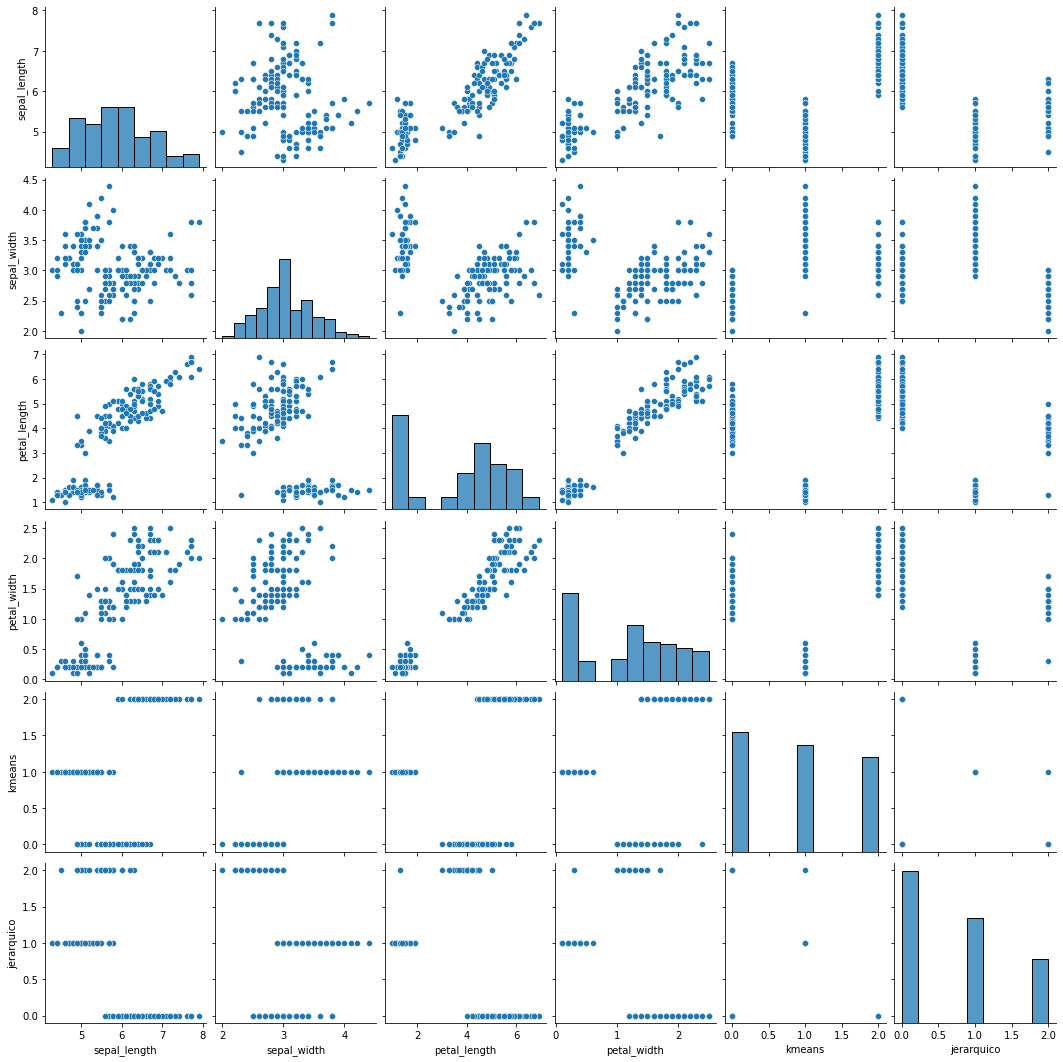

In [47]:
sns.pairplot(df)

In [50]:
df["kmeans"] = df["kmeans"].astype("str")
df["jerarquico"] = df["jerarquico"].astype("str")

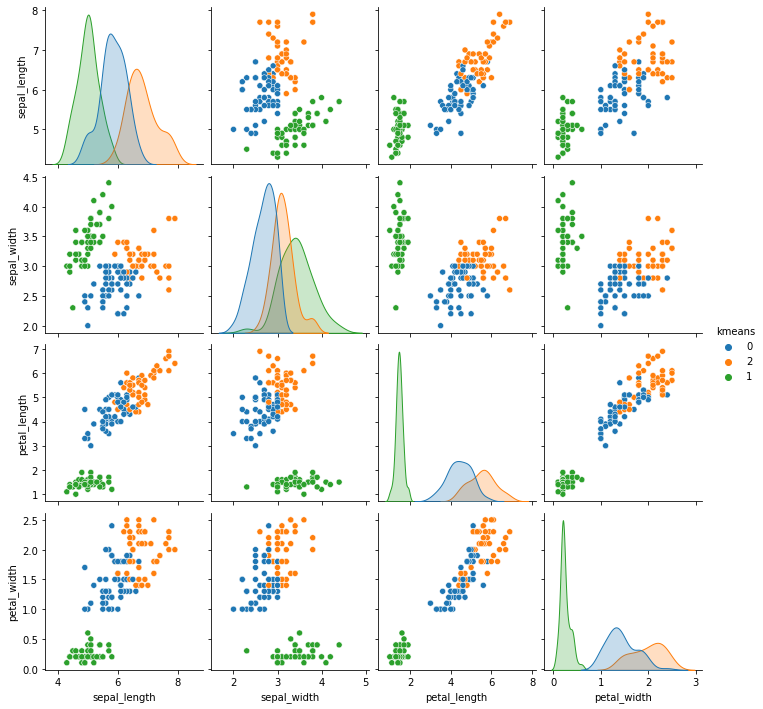

In [51]:
sns.pairplot(df,hue="kmeans")

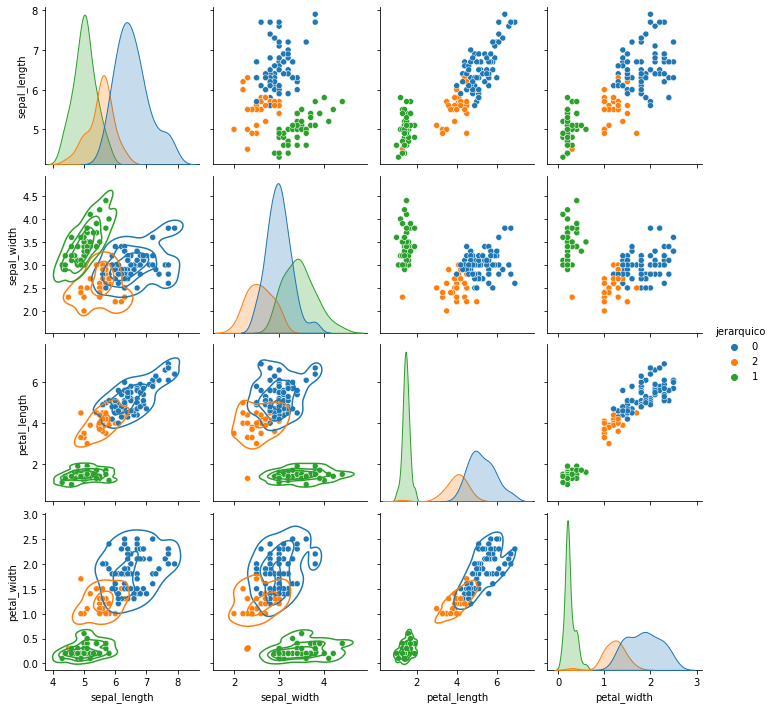

In [52]:
g = sns.pairplot(df,hue="jerarquico")
g.map_lower(sns.kdeplot, levels=4, color=".2")

# Donde nos equivocamos...

In [53]:
pd.crosstab(df.species,df.kmeans)

kmeans,0,1,2
species,,,
setosa,0,50,0
versicolor,39,0,11
virginica,17,0,33


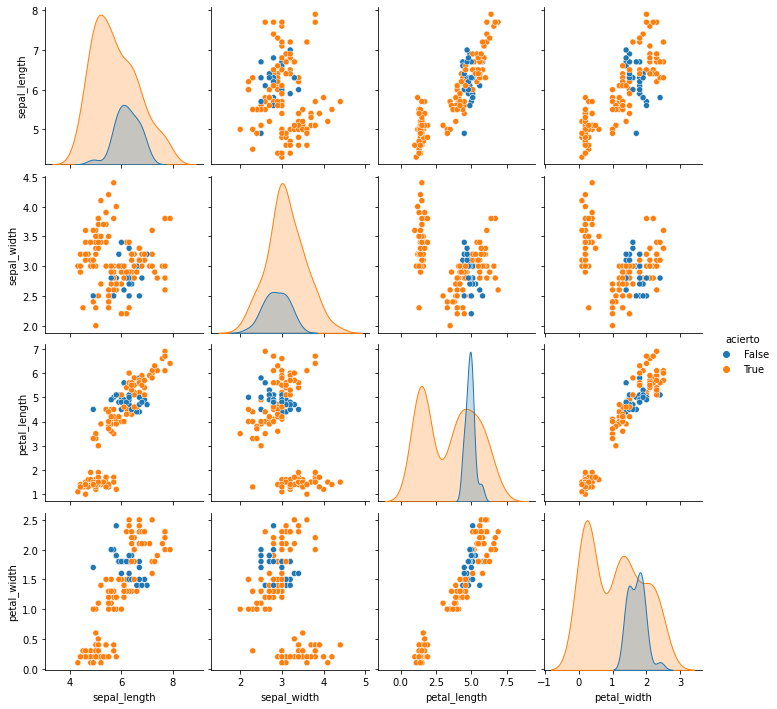

In [63]:
df["kmeansetiqueta"] = df["kmeans"].replace({"0": "versicolor","1":"setosa", "2":"virginica"})
df["acierto"] = df["kmeansetiqueta"] == df["species"]
sns.pairplot(df, hue = "acierto")

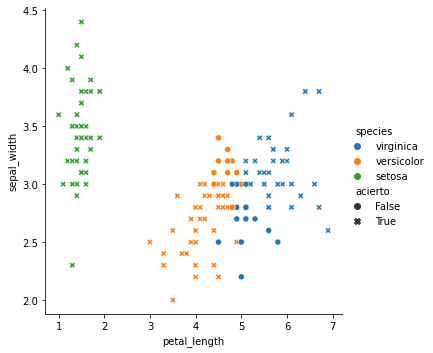

In [64]:
sns.relplot(data=df, x="petal_length", y="sepal_width", hue="species", style="acierto")

# Ejemplo con bucle


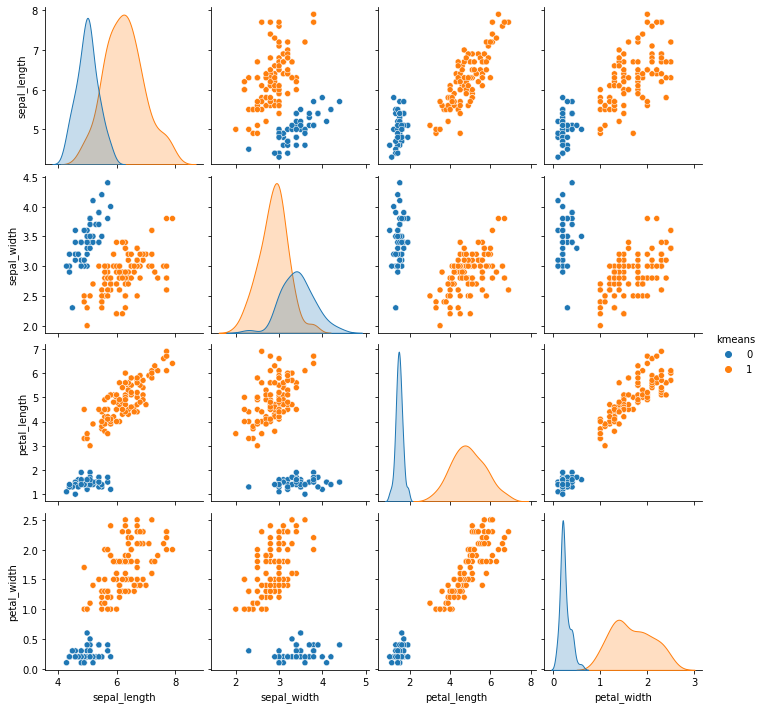

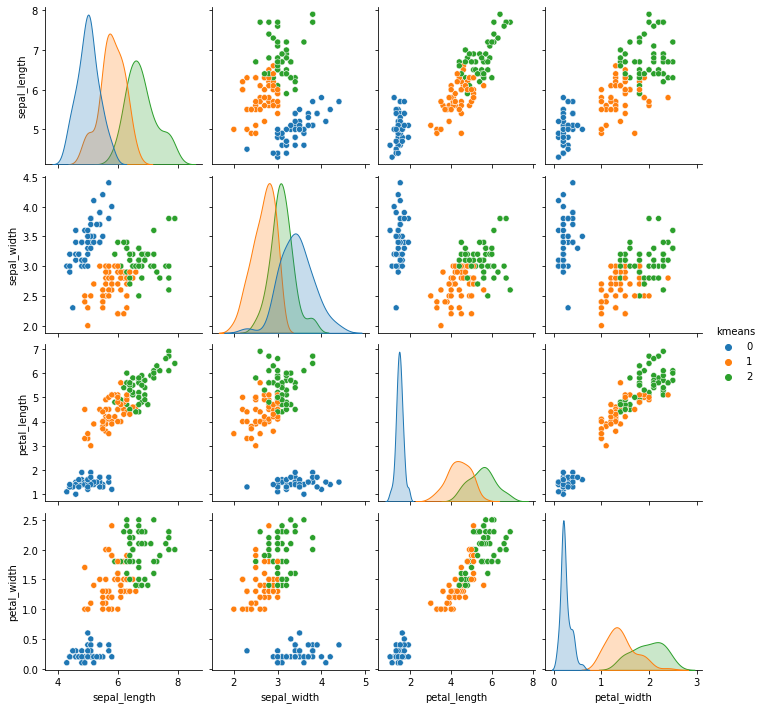

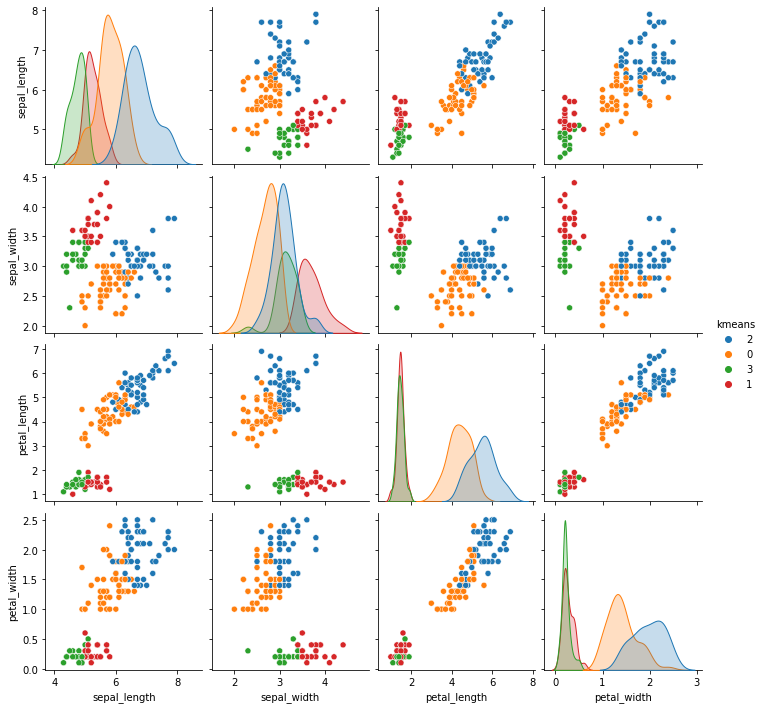

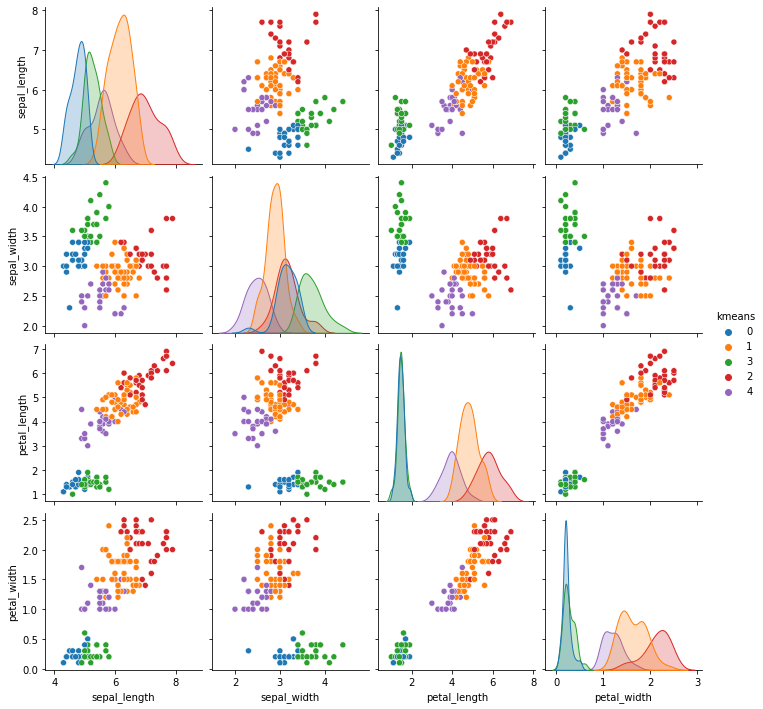

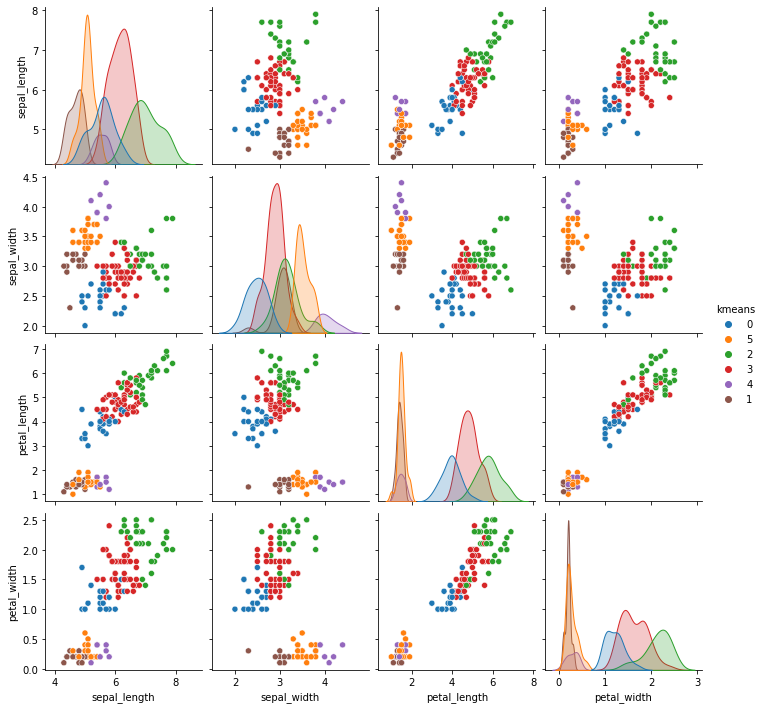

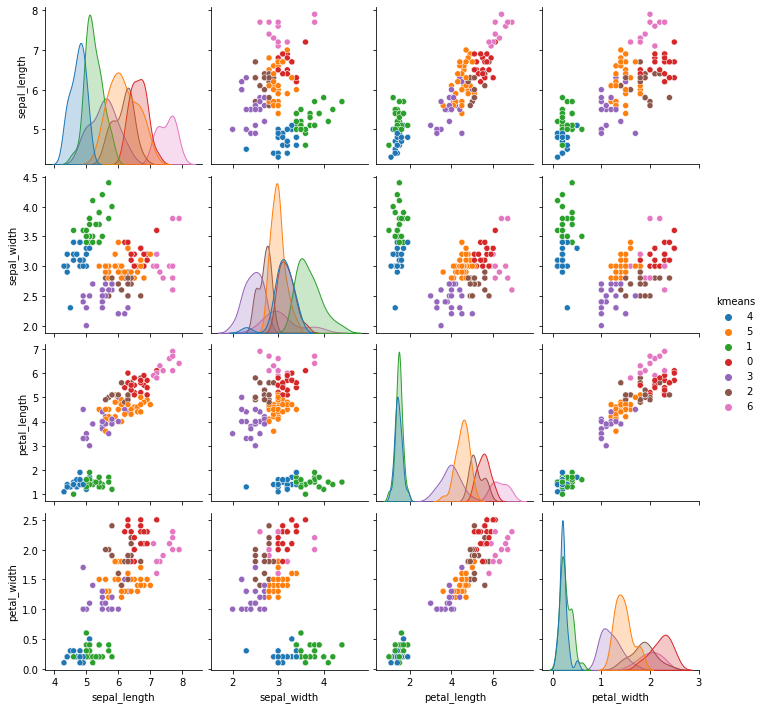

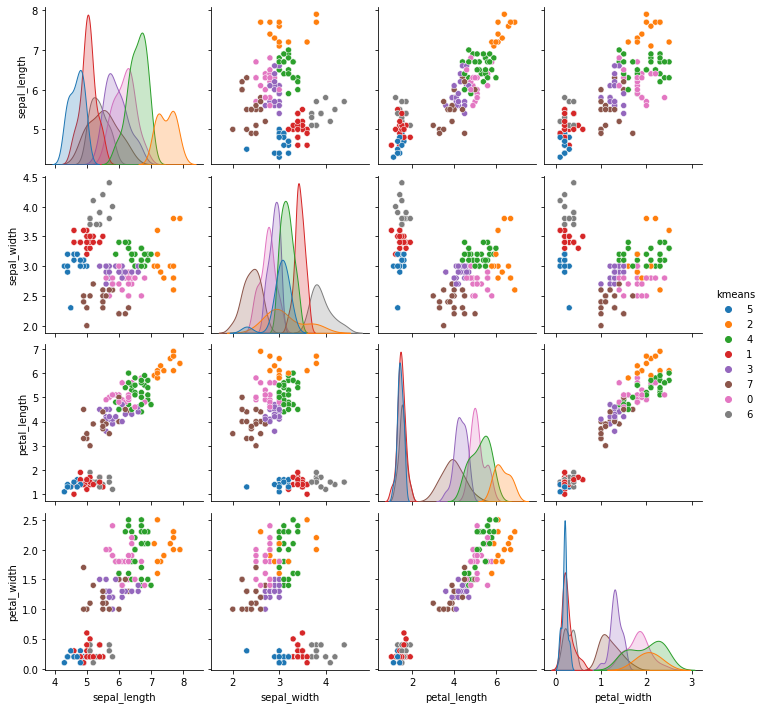

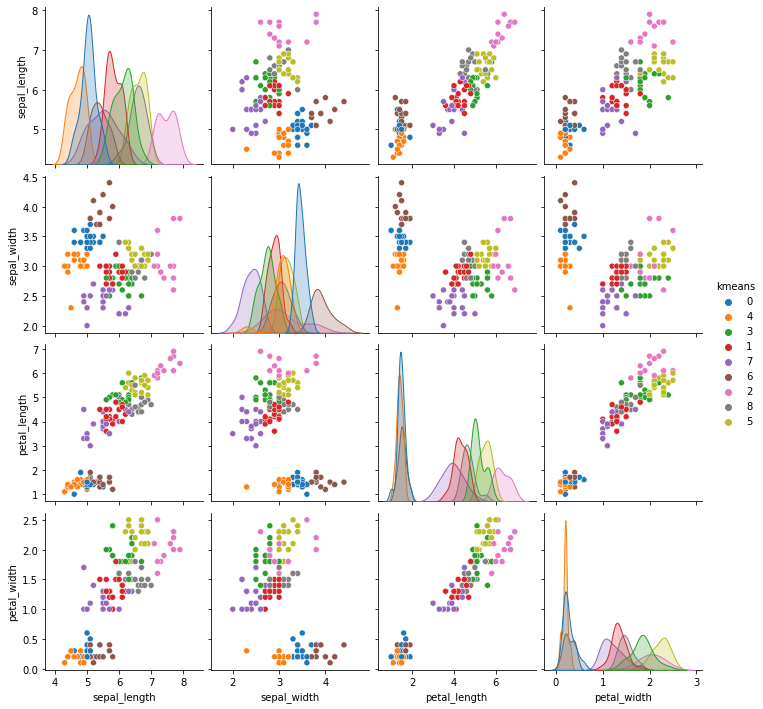

In [70]:
df = sns.load_dataset("iris").sample(frac = 1)
X = df[["sepal_length", "sepal_width","petal_length","petal_width"]]
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = X.columns)

for grupos in range(2,10):
    kmeans = KMeans(n_clusters=grupos, random_state=0).fit(X_scaled)
    df["kmeans"] = kmeans.labels_

    df["kmeans"] = df["kmeans"].astype("str")
    sns.pairplot(df,hue = "kmeans")
    plt.show()

3. ¿Cuál de los dos algoritmos da resultados más equilibrados (tamaños de los grupos) con estos datos?

4. ¿Funciona mejor el modelo con los datos reescalados?

5. Compara los grupos que has generado con las especies, tienen sentido? Como lo representaríamos?

6. Explora algún algoritmo de clustering distinto a los que ya hemos visto, y aplicalo sobre iris o los datos de los vuelos

7. Usando un bucle, estudia cuánto tarda en ajustarse un Kmeans y una agrupación jerárquica para distintas cantidades de datos (100,1000,10000,100000, por ejemplo)

© Netmind S.L.

Todos los derechos reservados. Este documento (v1.00) ha sido diseñado para el uso exclusivo del cliente que atiende a esta formación.

Ninguna parte de este documento puede ser reproducida, distribuida o transmitida en cualquier forma o por cualquier medio sin el permiso previo por escrito de Netmind.